In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [71]:
df=pd.read_csv('winequality-white.csv', sep=';')
dataset_best=df.loc[df['quality']>=8,:]
dataset_fair=df.loc[(df['quality']>=5) & (df['quality']<=7),:]
dataset_poor=df.loc[(df['quality']<5),:]
dataset_best.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8
22,6.8,0.26,0.42,1.7,0.049,41.0,122.0,0.9930,3.47,0.48,10.5,8
68,6.7,0.23,0.31,2.1,0.046,30.0,96.0,0.9926,3.33,0.64,10.7,8
74,6.7,0.23,0.31,2.1,0.046,30.0,96.0,0.9926,3.33,0.64,10.7,8


In [81]:
df['fixed acidity'] = df['fixed acidity'].astype('category')
df['volatile acidity'] = df['volatile acidity'].astype('category') 
df['citric acid'] = df['citric acid'].astype('category')
df['residual sugar'] = df['residual sugar'].astype('category') 
df['chlorides'] = df['chlorides'].astype('category')
df['free sulfur dioxide'] = df['free sulfur dioxide'].astype('category')
df['total sulfur dioxide'] = df['total sulfur dioxide'].astype('category')
df['density'] = df['density'].astype('category')
df['pH'] = df['pH'].astype('category')
df['sulphates'] = df['sulphates'].astype('category')
df['alcohol'] = df['alcohol'].astype('category')
df['quality'] = df['quality'].astype('category')

# use .cat.codes on `category` type to map all literals to numeric values
df['fixed acidity'] = df['fixed acidity'].cat.codes
df['volatile acidity'] = df['volatile acidity'].cat.codes
df['citric acid'] = df['citric acid'].cat.codes
df['residual sugar'] = df['residual sugar'].cat.codes
df['chlorides'] = df['chlorides'].cat.codes
df['free sulfur dioxide'] = df['free sulfur dioxide'].cat.codes
df['total sulfur dioxide'] = df['total sulfur dioxide'].cat.codes
df['density'] = df['density'].cat.codes
df['pH'] = df['pH'].cat.codes
df['sulphates'] = df['sulphates'].cat.codes
df['alcohol'] = df['alcohol'].cat.codes
df['quality'] = df['quality'].cat.codes
df['quality'].values

3    2198
2    1457
4     880
5     175
1     163
0      20
6       5
Name: quality, dtype: int64

In [75]:
#set train dataset retrieving 150 rows from 3 dataframes
X_train=pd.concat([dataset_best.iloc[0:150,0:11],dataset_fair.iloc[0:150,0:11],dataset_poor.iloc[0:150,0:11]])
Y_train=pd.concat([dataset_best.iloc[0:150,11:12],dataset_fair.iloc[0:150,11:12],dataset_poor.iloc[0:150,11:12]])
Y_train.shape

#set test dataset retrieving 30 rows from 3 dataframes
X_test=pd.concat([dataset_best.iloc[150:180,0:11],dataset_fair.iloc[150:180,0:11],dataset_poor.iloc[150:180,0:11]])
Y_test=pd.concat([dataset_best.iloc[150:180,11:12],dataset_fair.iloc[150:180,11:12],dataset_poor.iloc[150:180,11:12]])
X_test.shape

(90, 11)

In [76]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [77]:
pred=dt.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,pred)

0.4666666666666667

In [79]:
pred

array([8, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 6, 8, 8, 8, 8, 8, 8,
       8, 4, 8, 8, 8, 9, 9, 8, 5, 5, 6, 5, 6, 4, 8, 4, 4, 9, 6, 8, 8, 7,
       5, 6, 4, 4, 4, 5, 4, 4, 4, 8, 4, 4, 8, 6, 4, 5, 4, 8, 9, 8, 5, 4,
       3, 4, 7, 6, 6, 4, 4, 4, 4, 4, 5, 5, 3, 8, 4, 8, 5, 8, 4, 4, 4, 6,
       4, 8], dtype=int64)

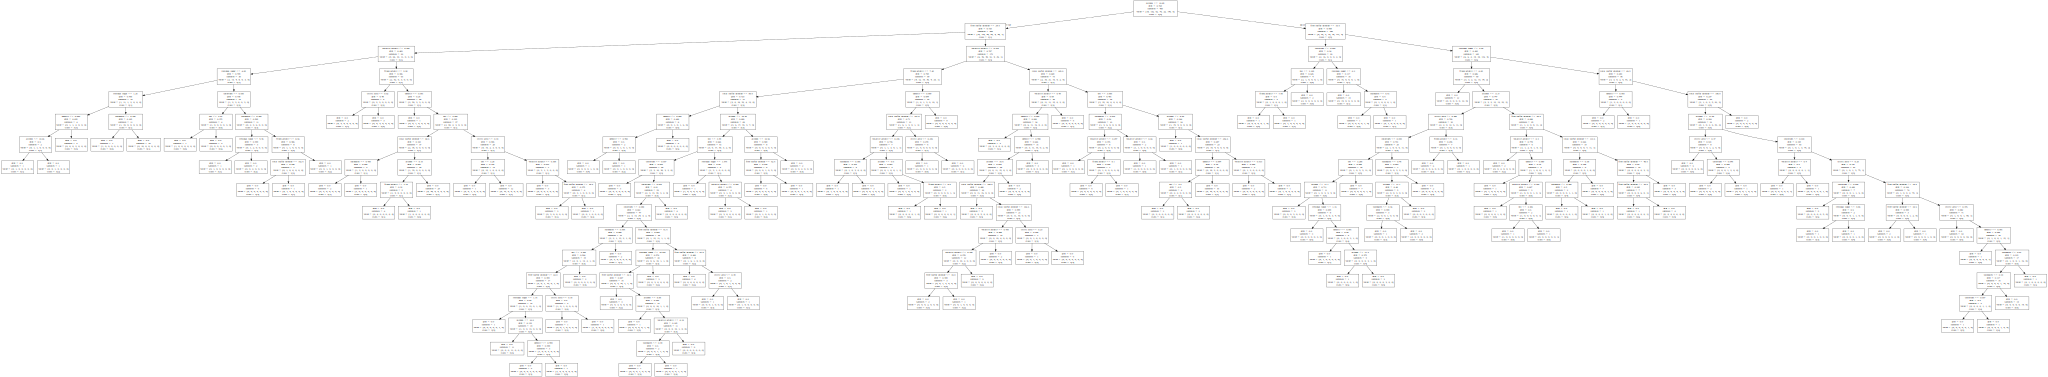

In [82]:
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= X_train.columns)) # display the tree, with no output file